<a href="https://colab.research.google.com/github/dhruv0rathore/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

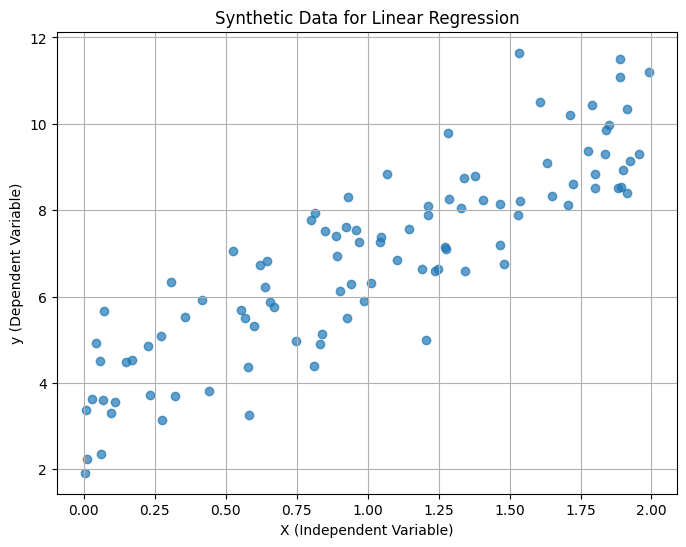

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.grid(True)
plt.show()

In [2]:
X_b = np.c_[np.ones((len(X), 1)), X]

print("Original X shape:", X.shape)
print("X_b shape (with intercept term):", X_b.shape)
print("First 5 rows of X_b:\n", X_b[:5])

Original X shape: (100, 1)
X_b shape (with intercept term): (100, 2)
First 5 rows of X_b:
 [[1.         0.30832568]
 [1.         1.48009939]
 [1.         0.52663003]
 [1.         1.06747879]
 [1.         0.02914992]]


In [3]:
XTX = X_b.T @ X_b

print("\nShape of X_b.T:", X_b.T.shape)
print("Shape of X_b:", X_b.shape)
print("Shape of XTX (X_b.T @ X_b):", XTX.shape)
print("XTX matrix:\n", XTX)


Shape of X_b.T: (2, 100)
Shape of X_b: (100, 2)
Shape of XTX (X_b.T @ X_b): (2, 2)
XTX matrix:
 [[100.         101.90700718]
 [101.90700718 140.03003375]]


In [4]:
XTX_inv = np.linalg.inv(XTX)

print("\nShape of XTX_inv:", XTX_inv.shape)
print("XTX_inv matrix (inverse of XTX):\n", XTX_inv)


Shape of XTX_inv: (2, 2)
XTX_inv matrix (inverse of XTX):
 [[ 0.03870408 -0.02816694]
 [-0.02816694  0.02763985]]


In [5]:
XTX_inv = np.linalg.inv(XTX)

print("\nShape of XTX_inv:", XTX_inv.shape)
print("XTX_inv matrix (inverse of XTX):\n", XTX_inv)


Shape of XTX_inv: (2, 2)
XTX_inv matrix (inverse of XTX):
 [[ 0.03870408 -0.02816694]
 [-0.02816694  0.02763985]]


In [6]:
XTy = X_b.T @ y

print("\nShape of X_b.T:", X_b.T.shape)
print("Shape of y:", y.shape)
print("Shape of XTy (X_b.T @ y):", XTy.shape)
print("XTy matrix:\n", XTy)


Shape of X_b.T: (2, 100)
Shape of y: (100, 1)
Shape of XTy (X_b.T @ y): (2, 1)
XTy matrix:
 [[690.16859696]
 [820.03346812]]


In [7]:
theta_normal_equation = XTX_inv @ XTy

print("\nShape of theta_normal_equation:", theta_normal_equation.shape)
print("Parameters found by Normal Equation (theta_0, theta_1):\n", theta_normal_equation)


Shape of theta_normal_equation: (2, 1)
Parameters found by Normal Equation (theta_0, theta_1):
 [[3.61451104]
 [3.22566133]]



Shape of y_pred_normal_equation: (100, 1)
First 5 predicted y values:
 [[4.60906528]
 [8.38881042]
 [5.31324117]
 [7.05783609]
 [3.70853883]]


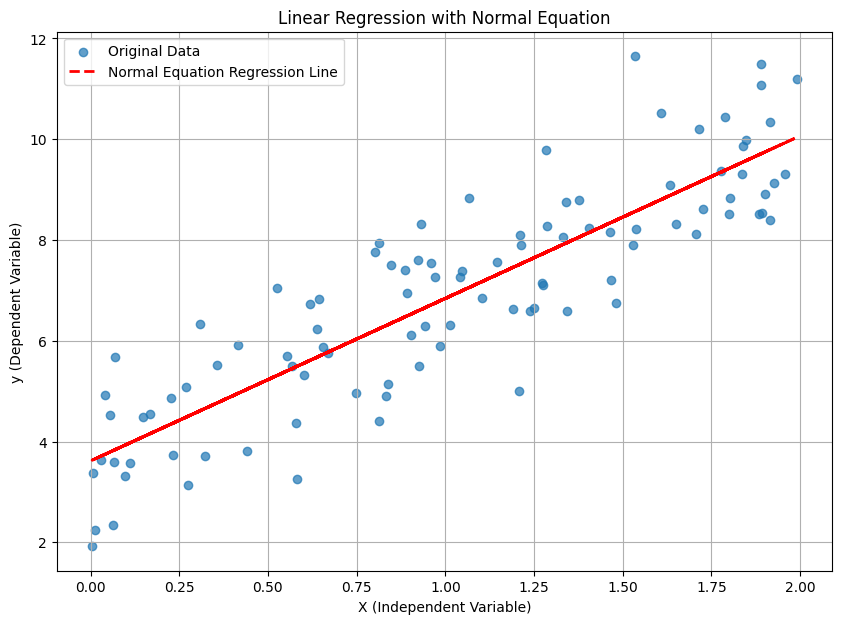

In [8]:
y_pred_normal_equation = X_b @ theta_normal_equation

print("\nShape of y_pred_normal_equation:", y_pred_normal_equation.shape)
print("First 5 predicted y values:\n", y_pred_normal_equation[:5])
plt.figure(figsize=(10, 7))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, y_pred_normal_equation, color='red', linestyle='--', linewidth=2, label='Normal Equation Regression Line')
plt.title('Linear Regression with Normal Equation')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def calculate_mse(y_true, y_predicted):

    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)

    errors = y_true - y_predicted

    squared_errors = errors**2

    mse = np.mean(squared_errors)
    return mse

mse_normal_equation = calculate_mse(y, y_pred_normal_equation)
print(f"\nMSE for Normal Equation: {mse_normal_equation:.4f}")


MSE for Normal Equation: 1.1509


In [10]:
def calculate_r_squared(y_true, y_predicted):

    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)

    total_sum_of_squares = np.sum((y_true - np.mean(y_true))**2)

    residual_sum_of_squares = np.sum((y_true - y_predicted)**2)

    if total_sum_of_squares == 0:
        return 1.0 if residual_sum_of_squares == 0 else 0.0

    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

    return r_squared

r_squared_normal_equation = calculate_r_squared(y, y_pred_normal_equation)
print(f"\nR-squared for Normal Equation: {r_squared_normal_equation:.4f}")




R-squared for Normal Equation: 0.7659


In [11]:
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y)**2)
    return cost

initial_theta_guess = np.zeros((2, 1))
badness_score_zero = compute_cost(X_b, y, initial_theta_guess)
print(f"Badness score with theta [0, 0]: {badness_score_zero:.4f}")

good_theta_guess = np.array([[4],[3]])
badness_score_good = compute_cost(X_b, y, good_theta_guess)
print(f"Badness score with theta [4, 3]: {badness_score_good:.4f}")

Badness score with theta [0, 0]: 26.2743
Badness score with theta [4, 3]: 0.5968


In [12]:
def compute_gradient(X_b, y, theta):
    m = len(y)
    predictions = X_b @ theta
    errors = predictions - y
    gradient = (1 / m) * X_b.T @ errors
    return gradient

initial_theta_guess = np.zeros((2, 1))
gradient_at_zero = compute_gradient(X_b, y, initial_theta_guess)
print(f"Gradient at theta [0, 0]:\n{gradient_at_zero.flatten()}")

good_theta_guess = np.array([[4],[3]])
gradient_at_good = compute_gradient(X_b, y, good_theta_guess)
print(f"Gradient at theta [4, 3]:\n{gradient_at_good.flatten()}")

Gradient at theta [0, 0]:
[-6.90168597 -8.20033468]
Gradient at theta [4, 3]:
[0.15552425 0.07684662]


Starting Gradient Descent...
Iteration    0: Cost = 16.0722, Theta = [0.6901686  0.82003347]
Iteration  100: Cost = 0.5771, Theta = [3.50398935 3.31658755]
Iteration  200: Cost = 0.5755, Theta = [3.59284163 3.24348876]
Iteration  300: Cost = 0.5754, Theta = [3.61026243 3.22915666]
Iteration  400: Cost = 0.5754, Theta = [3.61367804 3.22634664]
Iteration  500: Cost = 0.5754, Theta = [3.61434772 3.2257957 ]
Iteration  600: Cost = 0.5754, Theta = [3.61447902 3.22568768]
Iteration  700: Cost = 0.5754, Theta = [3.61450477 3.2256665 ]
Iteration  800: Cost = 0.5754, Theta = [3.61450981 3.22566234]
Iteration  900: Cost = 0.5754, Theta = [3.6145108  3.22566153]

Gradient Descent Finished!
Final Theta (GD): [3.614511   3.22566137]
Final Cost (GD): 0.5754


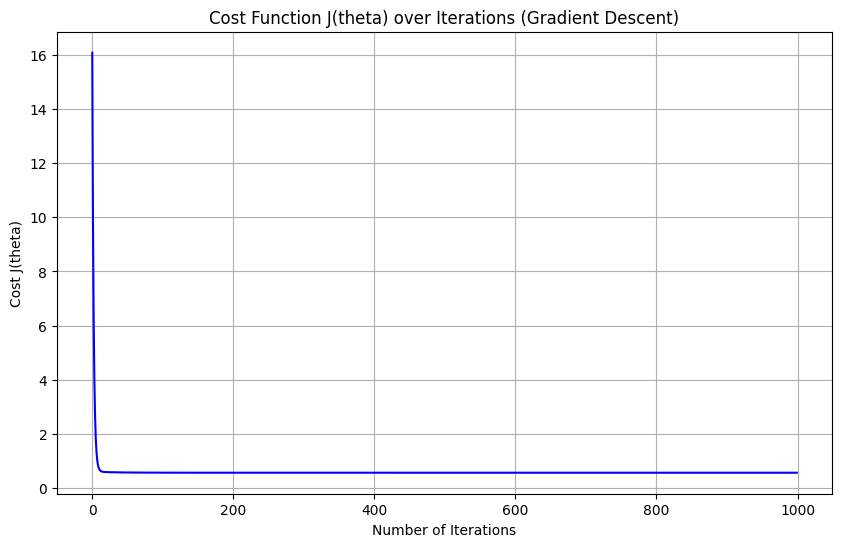

In [13]:
theta_gd = np.zeros((2, 1))

learning_rate = 0.1
n_iterations = 1000

cost_history = []

print("Starting Gradient Descent...")
for iteration in range(n_iterations):
    gradient = compute_gradient(X_b, y, theta_gd)

    theta_gd = theta_gd - learning_rate * gradient

    cost = compute_cost(X_b, y, theta_gd)
    cost_history.append(cost)

    if iteration % 100 == 0:
        print(f"Iteration {iteration:4d}: Cost = {cost:.4f}, Theta = {theta_gd.flatten()}")

print("\nGradient Descent Finished!")
print(f"Final Theta (GD): {theta_gd.flatten()}")
print(f"Final Cost (GD): {cost_history[-1]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history, color='blue')
plt.title('Cost Function J(theta) over Iterations (Gradient Descent)')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J(theta)')
plt.grid(True)
plt.show()


  **Finally encapsulating and making our model usable**

--- Testing LinearRegression with Normal Equation ---
Learned Theta (Normal Equation): [3.61451104 3.22566133]
MSE (Normal Equation Class): 1.1509
R-squared (Normal Equation Class): 0.7659


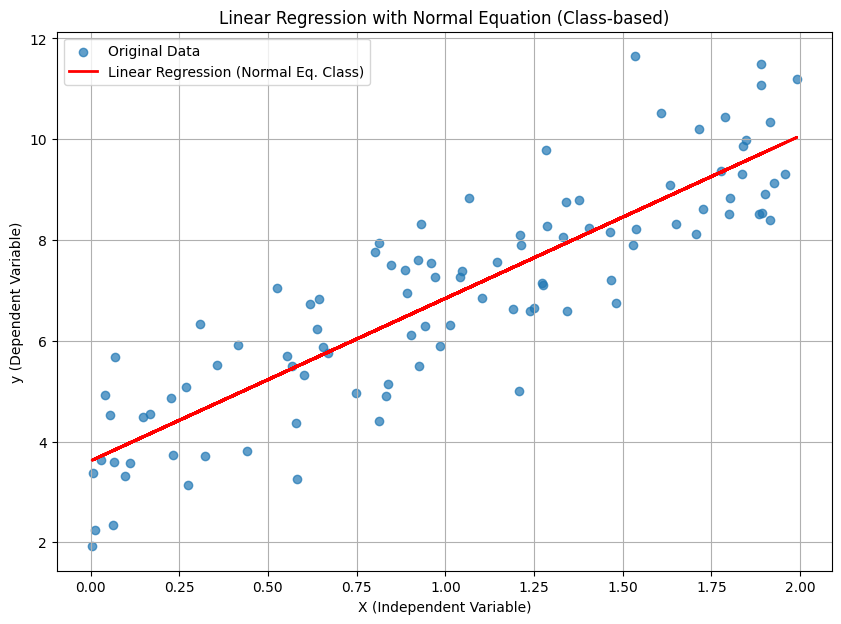

In [14]:
def calculate_mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

def calculate_r_squared(y_true, y_predicted):
    total_sum_of_squares = np.sum((y_true - np.mean(y_true))**2)
    residual_sum_of_squares = np.sum((y_true - y_predicted)**2)
    if total_sum_of_squares == 0:
        return 1.0 if residual_sum_of_squares == 0 else 0.0
    return 1 - (residual_sum_of_squares / total_sum_of_squares)
# -----------------------------------------------------------------------

class LinearRegression:
    def __init__(self):
        """
        Initializes the LinearRegression model.
        The 'theta' parameters will be learned during the fit process.
        """
        self.theta = None # Model parameters (slope and intercept)

    def _prepare_X(self, X):
        """
        Prepares the input features X by adding a column of ones for the intercept.
        This is our X_b.
        """
        # Ensure X is a 2D array
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return np.c_[np.ones((X.shape[0], 1)), X]

    def fit_normal_equation(self, X, y):
        """
        Trains the Linear Regression model using the Normal Equation.
        Finds the optimal theta directly.

        Args:
            X (numpy.ndarray): The input features (independent variable).
            y (numpy.ndarray): The target values (dependent variable).
        """
        X_b = self._prepare_X(X) # Prepare X by adding bias (column of ones)

        # Normal Equation formula: theta = (X_b^T @ X_b)^-1 @ X_b^T @ y
        XTX = X_b.T @ X_b
        # Check for invertibility (though not strictly necessary for well-behaved synthetic data)
        try:
            XTX_inv = np.linalg.inv(XTX)
        except np.linalg.LinAlgError:
            print("Warning: X^T X is singular. Normal Equation cannot be used.")
            self.theta = None
            return

        XTy = X_b.T @ y
        self.theta = XTX_inv @ XTy # Store the learned theta in the instance

    def predict(self, X):
        """
        Makes predictions using the learned theta.

        Args:
            X (numpy.ndarray): The input features for prediction.

        Returns:
            numpy.ndarray: The predicted target values.
        """
        if self.theta is None:
            raise ValueError("Model has not been fitted yet. Call fit_normal_equation or fit_gradient_descent first.")

        X_b = self._prepare_X(X) # Prepare X for prediction (add bias term)
        return X_b @ self.theta

    def score(self, X, y_true):
        """
        Calculates the R-squared score of the model.

        Args:
            X (numpy.ndarray): The input features.
            y_true (numpy.ndarray): The actual target values.

        Returns:
            float: The R-squared score.
        """
        y_predicted = self.predict(X)
        return calculate_r_squared(y_true, y_predicted)


# --- Test the new LinearRegression class with Normal Equation ---
print("--- Testing LinearRegression with Normal Equation ---")
model_ne = LinearRegression() # Create an instance of our model
model_ne.fit_normal_equation(X, y) # Train the model

print(f"Learned Theta (Normal Equation): {model_ne.theta.flatten()}")

# Make predictions using the fitted model
y_pred_ne_class = model_ne.predict(X)

# Evaluate the model
mse_ne_class = calculate_mse(y, y_pred_ne_class)
r2_ne_class = model_ne.score(X, y) # Using the score method

print(f"MSE (Normal Equation Class): {mse_ne_class:.4f}")
print(f"R-squared (Normal Equation Class): {r2_ne_class:.4f}")

# Plotting the result of the class-based model
plt.figure(figsize=(10, 7))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, y_pred_ne_class, color='red', linestyle='-', linewidth=2, label='Linear Regression (Normal Eq. Class)')
plt.title('Linear Regression with Normal Equation (Class-based)')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()


--- Testing LinearRegression with Gradient Descent ---

--- Starting Gradient Descent with LR=0.1, Iterations=1000 ---
Iteration    0: Cost = 15.9432, Theta = [0.68200041 0.73840826]
Iteration  100: Cost = 0.4080, Theta = [4.03863221 2.92592146]
Iteration  200: Cost = 0.4034, Theta = [4.18323361 2.79824628]
Iteration  300: Cost = 0.4033, Theta = [4.20934302 2.7751931 ]
Iteration  400: Cost = 0.4033, Theta = [4.21405736 2.77103059]
Iteration  500: Cost = 0.4033, Theta = [4.21490859 2.770279  ]
Iteration  600: Cost = 0.4033, Theta = [4.21506229 2.77014329]
Iteration  700: Cost = 0.4033, Theta = [4.21509004 2.77011879]
Iteration  800: Cost = 0.4033, Theta = [4.21509505 2.77011436]
Iteration  900: Cost = 0.4033, Theta = [4.21509596 2.77011356]
Gradient Descent Finished! Final Theta: [4.21509612 2.77011342]
Final Cost: 0.4033
MSE (Gradient Descent Class): 0.8066
R-squared (Gradient Descent Class): 0.7693


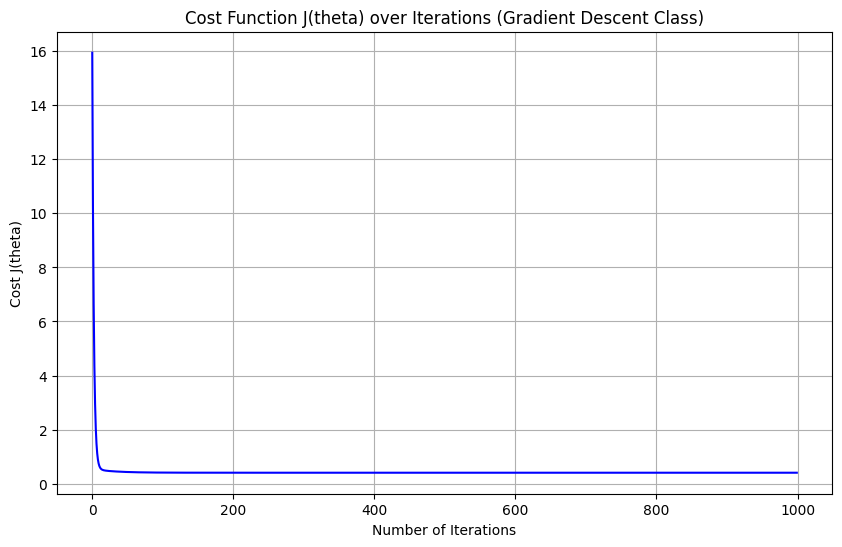

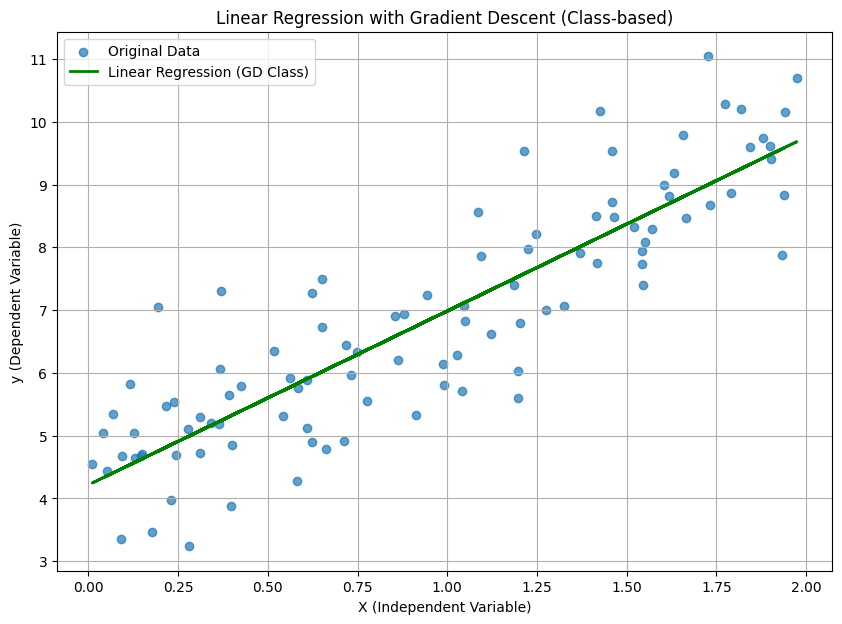

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# --- Synthetic Data Generation ---
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# ---------------------------------

# --- Our evaluation metrics (kept outside the class for now, for simplicity) ---
def calculate_mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

def calculate_r_squared(y_true, y_predicted):
    total_sum_of_squares = np.sum((y_true - np.mean(y_true))**2)
    residual_sum_of_squares = np.sum((y_true - y_predicted)**2)
    if total_sum_of_squares == 0:
        return 1.0 if residual_sum_of_squares == 0 else 0.0
    return 1 - (residual_sum_of_squares / total_sum_of_squares)
# -----------------------------------------------------------------------------

class LinearRegression:
    def __init__(self):
        self.theta = None # Model parameters (slope and intercept)
        self.cost_history = [] # To store cost at each iteration during GD

    def _prepare_X(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return np.c_[np.ones((X.shape[0], 1)), X]

    # --- Private helper method for cost calculation ---
    def _compute_cost(self, X_b, y, theta):
        m = len(y)
        predictions = X_b @ theta
        cost = (1 / (2 * m)) * np.sum((predictions - y)**2)
        return cost

    # --- Private helper method for gradient calculation ---
    def _compute_gradient(self, X_b, y, theta):
        m = len(y)
        predictions = X_b @ theta
        errors = predictions - y
        gradient = (1 / m) * X_b.T @ errors
        return gradient

    def fit_normal_equation(self, X, y):
        X_b = self._prepare_X(X)
        XTX = X_b.T @ X_b
        try:
            XTX_inv = np.linalg.inv(XTX)
        except np.linalg.LinAlgError:
            print("Warning: X^T X is singular. Normal Equation cannot be used.")
            self.theta = None
            return
        XTy = X_b.T @ y
        self.theta = XTX_inv @ XTy

    def fit_gradient_descent(self, X, y, learning_rate=0.01, n_iterations=1000):
        """
        Trains the Linear Regression model using Gradient Descent.

        Args:
            X (numpy.ndarray): The input features (independent variable).
            y (numpy.ndarray): The target values (dependent variable).
            learning_rate (float): The step size for each iteration (alpha).
            n_iterations (int): The number of iterations to run GD.
        """
        X_b = self._prepare_X(X) # Prepare X by adding bias
        m, n_features = X_b.shape # m = num samples, n_features = num features including bias (2 in our case)

        # Initialize theta (parameters) - usually with zeros
        self.theta = np.zeros((n_features, 1))

        # Reset cost history for this fit
        self.cost_history = []

        print(f"\n--- Starting Gradient Descent with LR={learning_rate}, Iterations={n_iterations} ---")
        for iteration in range(n_iterations):
            # Calculate gradient (direction of steepest ascent)
            gradient = self._compute_gradient(X_b, y, self.theta)

            # Update theta (take a step downhill)
            self.theta = self.theta - learning_rate * gradient

            # Record cost (for plotting convergence)
            cost = self._compute_cost(X_b, y, self.theta)
            self.cost_history.append(cost)

            if iteration % (n_iterations // 10) == 0: # Print every 10% of iterations
                print(f"Iteration {iteration:4d}: Cost = {cost:.4f}, Theta = {self.theta.flatten()}")

        print(f"Gradient Descent Finished! Final Theta: {self.theta.flatten()}")
        print(f"Final Cost: {self.cost_history[-1]:.4f}")


    def predict(self, X):
        if self.theta is None:
            raise ValueError("Model has not been fitted yet. Call fit_normal_equation or fit_gradient_descent first.")

        X_b = self._prepare_X(X)
        return X_b @ self.theta

    def score(self, X, y_true):
        y_predicted = self.predict(X)
        return calculate_r_squared(y_true, y_predicted)


# --- Test the new LinearRegression class with Gradient Descent ---
print("\n--- Testing LinearRegression with Gradient Descent ---")
model_gd = LinearRegression() # Create another instance for GD
model_gd.fit_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000) # Train the model with GD

# Make predictions using the fitted model
y_pred_gd_class = model_gd.predict(X)

# Evaluate the model
mse_gd_class = calculate_mse(y, y_pred_gd_class)
r2_gd_class = model_gd.score(X, y)

print(f"MSE (Gradient Descent Class): {mse_gd_class:.4f}")
print(f"R-squared (Gradient Descent Class): {r2_gd_class:.4f}")

# Plotting the Cost History from the class
plt.figure(figsize=(10, 6))
plt.plot(range(len(model_gd.cost_history)), model_gd.cost_history, color='blue')
plt.title('Cost Function J(theta) over Iterations (Gradient Descent Class)')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J(theta)')
plt.grid(True)
plt.show()

# Plotting the result of the class-based GD model on the data
plt.figure(figsize=(10, 7))
plt.scatter(X, y, alpha=0.7, label='Original Data')
plt.plot(X, y_pred_gd_class, color='green', linestyle='-', linewidth=2, label='Linear Regression (GD Class)')
plt.title('Linear Regression with Gradient Descent (Class-based)')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()